<a href="https://colab.research.google.com/github/Lima-filipe/Estudos/blob/main/construindo_uma_rede_basica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sobre Keras
<img src="https://drive.google.com/uc?id=1qUd5pI-C3DOFbJs8tGos9OCKZmPnNZYB" width="400px"><br>
Keras é uma API de redes neurais de alto nível, escrita em Python e capaz de ser executada no TensorFlow. <br>
Ele permite uma prototipagem fácil e rápida e é compatível com redes convolucionais e redes recorrentes. <br>
Suas características mais importantes são: facilidade de uso, modularidade, fácil extensibilidade

# Table of contents

1. [Construindo um Perceptron de Camada Única](#slp)<br>
     1.1 [Funções de ativação](#af)<br>
2. [Construindo um Perceptron multicamadas](#mlp)<br>
     2.1 [Configurações de um modelo](#cm)<br>
3. [Deep Neural Network on Fashion MNIST data] (# dnn) <br>
     3.1 [Plotar imagens de amostra do conjunto de dados] (#psi) <br>
     3.2 [Construir um DNN](#bdnn)<br>
     3.3 [Compile o modelo](#ctm)<br>
     3.4 [Treine o modelo](#tm)<br>
     3.5 [Trace a visualização do histórico de treinamento](# pthv)<br>
4. [Gerenciando o ajuste excessivo do modelo](# mmo)<br>
     4.1 [Regularização de peso](# wr)<br>
     4.2 [Dropout](#drop)<br>
     4.3 [Parada Antecipada](# es)<br>
5. [Conclusão](#conc)

# Construindo um perceptron de camada única <a class="anchor" id="slp"></a>
<img src="https://drive.google.com/uc?id=1cvJa9WfOier2NQIJGHpqDNGn-RlczU1x" width="500px"><br>
Um perceptron de camada única pode ser considerado uma unidade de aprendizagem única na rede. Este nó obterá entradas da camada de entrada, realizará a tarefa de aprendizagem junto com a função de ativação. <br>
### Algumas funções de ativação mais comumente usadas são mostradas aqui. <a class="anchor" id="af"></a>

<img src="https://drive.google.com/uc?id=1Rr_1OJeORL6qmGFplC0E2hFj-KapFGN0" width="600px"><br>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# define o numero de entradas e saidas
out_nodes = 2
in_nodes = 2

model = Sequential()    # Esta função permite que você crie um modelo sequencial (uma pilha) ao qual você pode adicionar quantas camadas densas desejar.

# Defina uma camada oculta com um único perceptron.
dense_layer = Dense(out_nodes, activation='sigmoid', kernel_initializer="Ones", bias_initializer="Ones")  #Uma função de ativação em uma rede neural fornece não linearidade aos dados, o que é importante para o aprendizado de recursos dos dados de entrada, caso contrário, o aprendizado será interrompido em um estágio específico e levará a um problema de neurônio morrendo.

model.add(dense_layer)

#### Já criamos nosso primeiro perceptron de camada única. Mas o trabalho pode não estar visível ainda.

## Construindo uma multilayer perceptron. <a class="anchor" id="mlp"></a>
MLPs são totalmente conectados com cada nó conectado a cada nó na outra camada. O diagrama abaixo dá uma ideia da aparência de um MLP.

<img src="https://drive.google.com/uc?id=16Uxs11_l8xl58978mRsxgEtdaTSG5KGb" width="400px"><br>

#### Vamos construir um MLP com 2 camadas densas ocultas e outra camada densa para a saída.

In [2]:
import numpy as np

# Generate some random data
train_data = np.random.random((1000, 100))
train_labels = np.random.randint(2, size=(1000, 1))
test_data = np.random.random((100, 100))
test_labels = np.random.randint(2, size=(100, 1))

units = 32

model = Sequential()

model.add(Dense(units, activation='relu', input_dim=100))       # Input dimension should be equal to the number of features
model.add(Dense(units, activation='relu'))

# A saída deve ser um único resultado, de forma que uma camada Densa seja definida com uma única unidade.
model.add(Dense(1, activation='sigmoid'))

### Configurações de um modelo <a class="anchor" id="cm"></a>

**função Loss** são usados para comparar a saída prevista da rede com a saída real, em cada passagem do algoritmo de retropropagação <br>
As funções de perda comuns são: erro quadrático médio, entropia cruzada e assim por diante ...<br><br>
**Metricas** são usados para avaliar um modelo; métricas comuns são precisão, recall, exatidão, auc, ..<br>

O ** Otimizador ** determina as regras de atualização dos pesos.
Abaixo está uma ideia de como funcionam os diferentes otimizadores. <br>

<img src="https://drive.google.com/uc?id=151nqtkDry6XPXYJvo3VqCHlwcB9XDXbk" width="460px" align="center">
<img src="https://drive.google.com/uc?id=1UfM-0QruDiOgy8cSxLmZHx3FI4pzLeDQ" width="360px" align="center">

#### Listados abaixo estão diferentes otimizadores, funções de perda e métricas. Para obter mais informações, você pode sempre consultar a documentação [here](http://www.tensorflow.org/api_docs/python/tf/keras/optimizers), [here](http://keras.io/losses/) and [here](http://www.tensorflow.org/api_docs/python/tf/metrics)

In [3]:
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, Adamax, Nadam, RMSprop

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
adad = Adadelta(lr=1.0,rho=0.95,epsilon=None,decay=0.0)
adag = Adagrad(lr=0.01,epsilon=None,decay=0.0)
adamax = Adamax(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0)
nadam = Nadam(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,schedule_decay=0.004)
rms = RMSprop(lr=0.001,rho=0.9,epsilon=None,decay=0.0)

loss = ['sparse_categorical_crossentropy','mean_squared_error','mean_absolute_error',
        'categorical_crossentropy','categorical_hinge']

metrics = ['accuracy','precision','recall']

In [7]:
# Compile the above created model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Optimises the learning by updating the weights with Stochastic Gradient Descent method.

# Train the model by fitting the train data to the model we compiled in the above line. This is stored in a variable because the output of 'fit' function is a history class which consists of 4 key, value pairs for accuracy, val_accuracy, loss, val_loss
history = model.fit(train_data, train_labels, epochs=30, batch_size=128)
_, train_acc = model.evaluate(train_data, train_labels, verbose=1)
_, test_acc = model.evaluate(test_data, test_labels, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/30
8/8 [==============================] - 0s 3ms/step - loss: 0.5580 - accuracy: 0.7382
Epoch 2/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7447
Epoch 3/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.7484
Epoch 4/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.7529
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7509
Epoch 6/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.7353
Epoch 7/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7722
Epoch 8/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.7732
Epoch 9/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5031 - accuracy: 0.7858
Epoch 10/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5192 - accuracy: 0.7667
Epoch 11/30
8/8 [======================

## Voila! Criamos nossa primeira rede neural profunda de múltiplas camadas que, na verdade, está aprendendo com os dados e fornecendo resultados.

# Deep Neural Network on Fashion MNIST data. <a class="anchor" id="dnn"></a>
Agora é hora de trabalhar com dados reais e construir uma rede neural profunda mais robusta.
Usaremos o conjunto de dados Fashion MNIST para nosso propósito. <br>
Fashion-MNIST é um conjunto de dados de imagens de artigos de Zalando que consiste em um conjunto de treinamento de 60.000 exemplos e um conjunto de teste de 10.000 exemplos.
Cada exemplo é uma imagem em tons de cinza de 28 × 28, associada a um rótulo de 10 classes.

In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
mnist_fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = mnist_fashion.load_data()

# split training set into training set and validation set using train_test_split provided by scikit-learn 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=77)

num_classes = 10   # The items in the dataset are to be classified into 1 of the 10 classes.

print(x_train.shape, x_val.shape, x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(45000, 28, 28) (15000, 28, 28) (10000, 28, 28)


### Trace algumas imagens de amostra do conjunto de dados. <a class="anchor" id="psi"></a>

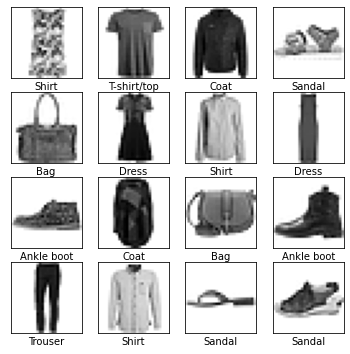

In [10]:
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Construa uma rede neural profunda neste conjunto de dados. <a class="anchor" id="bdnn"></a>

In [11]:
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Flatten())  # This function flattens the input data

# Feel free to play around with different parameters here like number of units in each layer or switching the activation function or increasing/decreasing the number of layers.
#model.add(Dense(512, activation='relu'))    

model.add(Dense(256, activation='relu')) 

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))   # The number of units in the last layer should always be the number of classes in which we have to classify our input data.

### Compilar o modelo <a class="anchor" id="ctm"></a>

In [12]:
model.compile(optimizer=adam, loss=loss[0], metrics=metrics[0])

### treinando nosso modelo <a class="anchor" id="tm"></a>

In [13]:
batch_size = 128
epochs = 50

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val, y_val))  # You can set verbose to 1 to get the status of your model training, 2 to get one line per epoch, here I kept it 0 to keep the notebook precise. 

_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.4683 - accuracy: 0.8740
Train: 0.931, Test: 0.874


### Trace a visualização do histórico de treinamento <a class="anchor" id="pthv"></a>

In [14]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

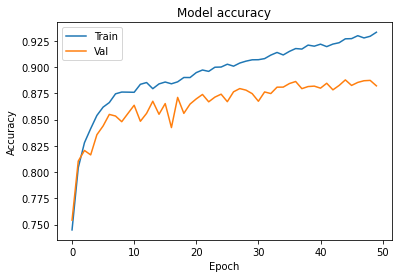

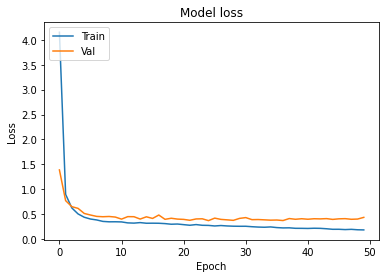

In [15]:
plot_history(history)

#### Parece que o modelo está se ajustando demais aqui. Um gráfico de perda ideal deve ser semelhante a este.
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQHXfXuIksn-3ejS8UFeawUppJTmN2endFI6w&usqp=CAU" width="460px" align="center">

#### Mas pelo menos conseguimos construir nossa primeira rede neural profunda. Viva! Percorremos um longo caminho.

# Gerenciando Modelagem Overfitting! <a class="anchor" id="mmo"></a>

Agora que treinamos nosso primeiro modelo, é hora de otimizar o treinamento do modelo para lidar com o problema de sobreajuste.

O overfitting pode ser tratado de várias maneiras. Algumas formas mais comuns que veremos aqui incluem:
* Regularização de peso
* Cair fora
* Parada antecipada ou chamadas de retorno

### Agora que treinamos nosso primeiro modelo, é hora de otimizar o treinamento do modelo para lidar com o problema de sobreajuste.

O overfitting pode ser tratado de várias maneiras. Algumas formas mais comuns que veremos aqui incluem:
* Regularização de peso
* Cair fora
* Parada antecipada ou chamadas de retorno

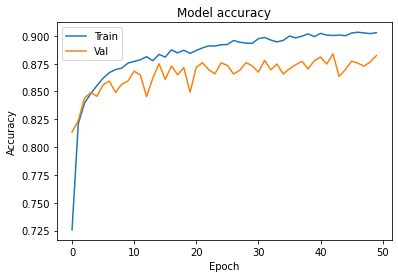

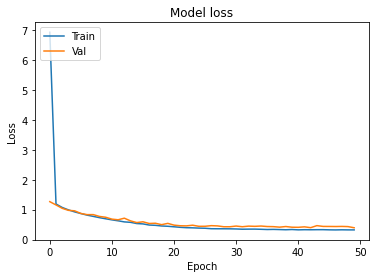

313/313 [==============================] - 1s 2ms/step - loss: 0.4252 - accuracy: 0.8727
Train: 0.914, Test: 0.873


In [16]:
from  tensorflow.keras import regularizers

# Build the model
model = Sequential()
model.add(Flatten())

# Add l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
#model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Add l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Add l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Add l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Add a Dense layer with number of neurons equal to the number of classes, with softmax as activation function
model.add(Dense(10, activation='softmax'))

# Compile the model created above.
model.compile(optimizer=adam, loss=loss[0], metrics=metrics[0])


# Fit the model created above to training and validation sets.
history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val, y_val))

# Call the plot_history function to plot the obtained results
plot_history(history)

# Evaluate the results
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

### Dropout <a class="anchor" id="drop"></a>
O dropout é outra técnica de regularização mais comumente usada para redes neurais. <br>
A eliminação, aplicada como uma camada oculta, elimina aleatoriamente uma série de recursos de saída da camada durante o treinamento.<br>
<img src="https://drive.google.com/uc?id=1PcGnn9cdM5JQk2nxRHAFPZAtBj1fNMvk" width="600px"><br>

A "dropout rate" é a fração dos recursos que estão sendo eliminados; geralmente é definido entre 0,2 e 0,5.

No momento do teste, nenhuma unidade é eliminada e, em vez disso, os valores de saída da camada são reduzidos por um fator igual à taxa de abandono, de modo a equilibrar o fato de que mais unidades estão ativas do que no tempo de treinamento.

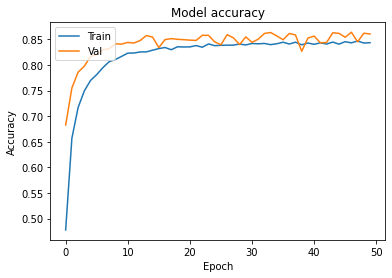

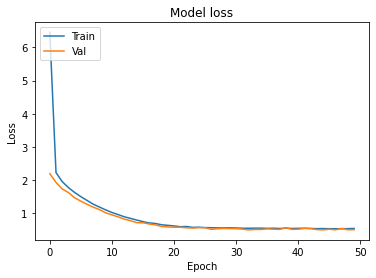

313/313 [==============================] - 1s 4ms/step - loss: 0.5293 - accuracy: 0.8526
Train: 0.872, Test: 0.853


In [ ]:
from tensorflow.keras.layers import Dropout

# Build the model
model = Sequential()
model.add(Flatten())

#model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dropout(0.3))   # Add a dropout layer with 0.3 probability
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))   # Add a dropout layer with 0.3 probability
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))   # Add a dropout layer with 0.3 probability
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(10, activation='softmax'))
 
model.compile(optimizer=adam, loss=loss[0], metrics=metrics[0])

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val, y_val))

plot_history(history)

_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

### Early Stopping <a class="anchor" id="es"></a>

O treinamento pode ser interrompido em uma época em que não haja melhora de precisão ou perda para um determinado número de rodadas. Esse número específico de rodadas é chamado de 'paciência'. Mesmo se declararmos um total de 1.000 épocas, o treinamento será interrompido de acordo com a paciência, uma vez que não encontre melhora na precisão.<br>

<img src="https://drive.google.com/uc?id=1prBt0w2oWIviRDjOSRKP2TglDGUr-EGZ" width="400px"><br><br>

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

os.mkdir('my_checkpoint_dir')

# Early stopping, for more refer documentation here: https://keras.io/callbacks/
es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

Epoch 00033: early stopping


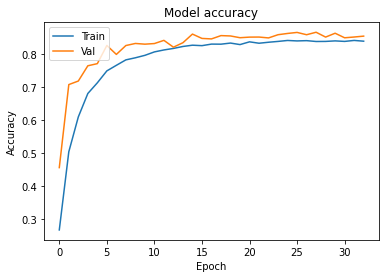

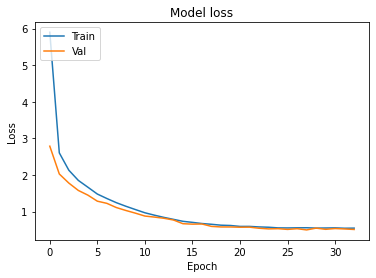

313/313 [==============================] - 1s 4ms/step - loss: 0.5380 - accuracy: 0.8459
Train: 0.866, Test: 0.846


In [ ]:
model = Sequential()
model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=adam, loss=loss[0], metrics=metrics[0])

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val, y_val), callbacks=[es_callback])  # The callbacks parameter of the fit() function is responsible to handle the Early Stopping.

plot_history(history)

_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))